# Desafio

A partir da base de seguros, prever o custo médio

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados
df = pd.read_csv("insurance.csv")

# Conhecendo os dados
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape

(1338, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
set(df['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


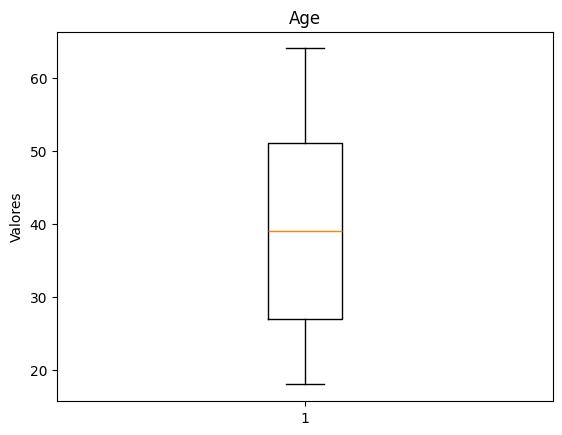

In [41]:
# Criar o gráfico de boxplot
plt.boxplot(df['age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

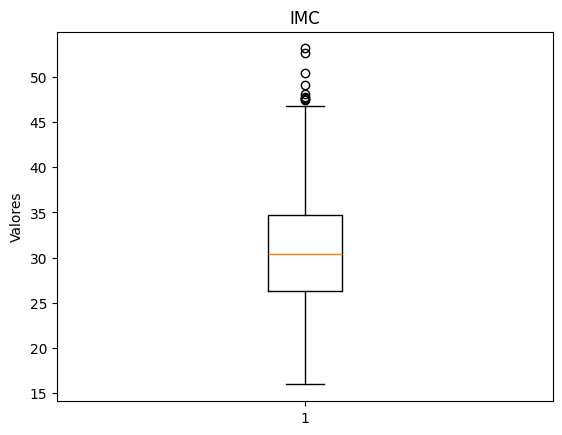

In [42]:
# Criar o gráfico de boxplot
plt.boxplot(df['bmi'])
plt.title('IMC')
plt.ylabel('Valores')
plt.show()

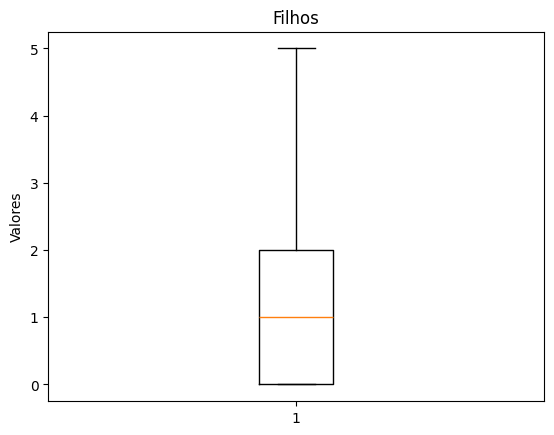

In [43]:
# Criar o gráfico de boxplot
plt.boxplot(df['children'])
plt.title('Filhos')
plt.ylabel('Valores')
plt.show()

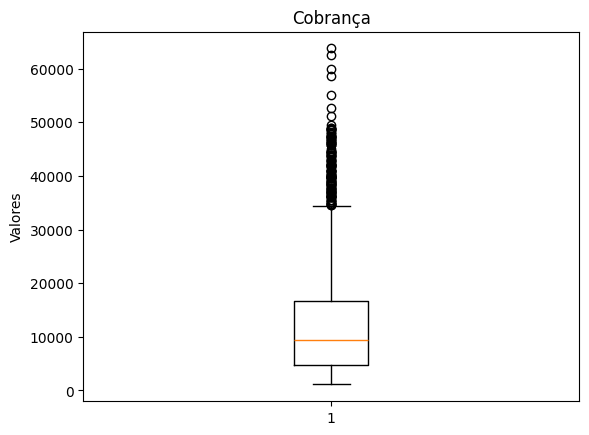

In [44]:
# Criar o gráfico de boxplot
plt.boxplot(df['charges'])
plt.title('Cobrança')
plt.ylabel('Valores')
plt.show()

In [5]:
import seaborn as sns
import numpy as np

# Criando dataframe somente com nossas variáveis numericas
df_numerico = df.select_dtypes([np.number])

# Calcula a matriz de correlação
correlation_matrix = df_numerico.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


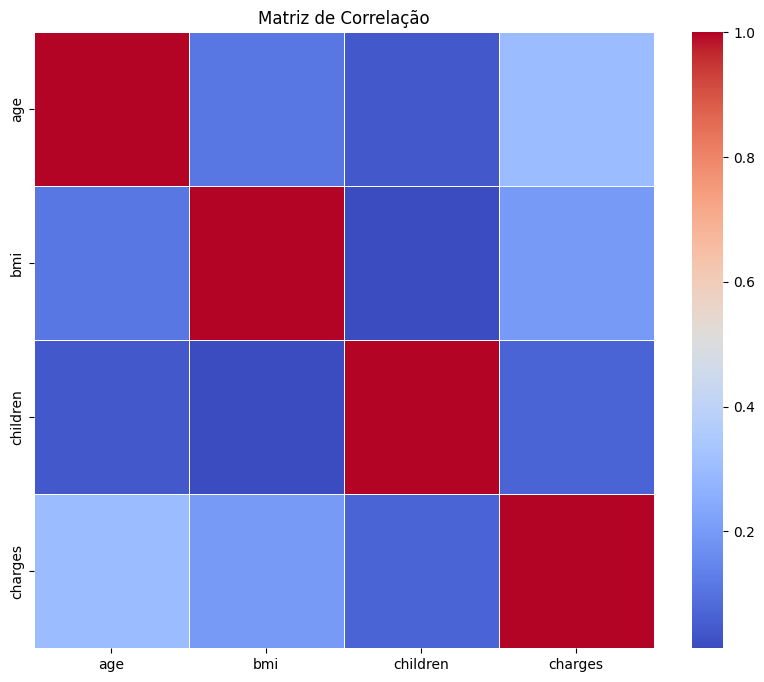

In [6]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separando as variaveis numericas
df_transformed = df.select_dtypes([np.number])

# Ajustar e transformar os rótulos
label_encoder = LabelEncoder()

df_transformed['sex'] = label_encoder.fit_transform(df['sex'])
df_transformed['smoker'] = label_encoder.fit_transform(df['smoker'])

# Ajustando as variavel categorica region
one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_region = one_hot_encoder.fit_transform(df[['region']])
encoded_df = pd.DataFrame(encoded_region, columns=['northeast', 'northwest', 'southeast', 'southwest'])

# juntando tudo
df_transformed.reset_index(inplace=True) 
encoded_df.reset_index(inplace=True)
                                                
df_transformed = pd.merge(df_transformed, encoded_df, on='index', how='inner').drop(columns='index')
df_transformed.head(10)

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1,0,0.0,1.0,0.0,0.0
5,31,25.740,0,3756.62160,0,0,0.0,0.0,1.0,0.0
6,46,33.440,1,8240.58960,0,0,0.0,0.0,1.0,0.0
7,37,27.740,3,7281.50560,0,0,0.0,1.0,0.0,0.0
8,37,29.830,2,6406.41070,1,0,1.0,0.0,0.0,0.0
9,60,25.840,0,28923.13692,0,0,0.0,1.0,0.0,0.0


In [10]:
# Separando as variáveis
from sklearn.model_selection import train_test_split

X = df_transformed.drop(columns=['charges']) # Variáveis características
y = df_transformed['charges'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Escalonando as variáveis
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled= scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

# Testando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(x_test_scaled)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico:.2f}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio:.2f}')
print(f'R² (coeficiente de determinação): {r_quadrado:2f}')

Erro Médio Quadrático: 33677393.31
Erro Absoluto Médio: 4203.57
R² (coeficiente de determinação): 0.783075
